Result is [[ 0.00000000e+00  0.00000000e+00]
 [ 3.24699469e-01  3.24699469e-01]
 [ 6.14212713e-01  6.14212713e-01]
 [ 8.37166478e-01  8.37166478e-01]
 [ 9.69400266e-01  9.69400266e-01]
 [ 9.96584493e-01  9.96584493e-01]
 [ 9.15773327e-01  9.15773327e-01]
 [ 7.35723911e-01  7.35723911e-01]
 [ 4.75947393e-01  4.75947393e-01]
 [ 1.64594590e-01  1.64594590e-01]
 [-1.64594590e-01 -1.64594590e-01]
 [-4.75947393e-01 -4.75947393e-01]
 [-7.35723911e-01 -7.35723911e-01]
 [-9.15773327e-01 -9.15773327e-01]
 [-9.96584493e-01 -9.96584493e-01]
 [-9.69400266e-01 -9.69400266e-01]
 [-8.37166478e-01 -8.37166478e-01]
 [-6.14212713e-01 -6.14212713e-01]
 [-3.24699469e-01 -3.24699469e-01]
 [-2.44929360e-16 -2.44929360e-16]]
Result shape is (20, 2)
(20, 20)
(2, 2)
(2,)
(20,)
Result is [[ 0.00000000e+00  0.00000000e+00]
 [ 3.24699469e-01  3.24699469e-01]
 [ 6.14212713e-01  6.14212713e-01]
 [ 8.37166478e-01  8.37166478e-01]
 [ 9.69400266e-01  9.69400266e-01]
 [ 9.96584493e-01  9.96584493e-01]
 [ 9.15773327e-01 

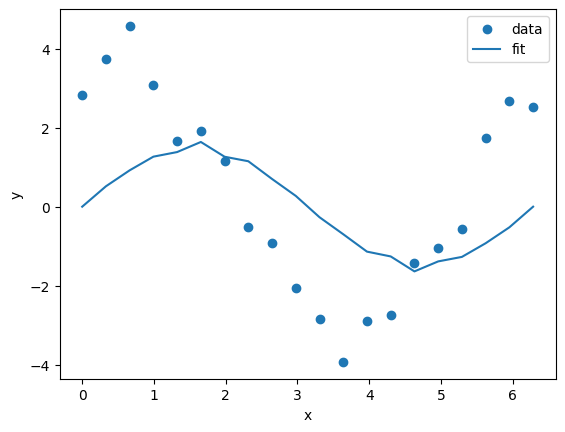

The coefficients are: a = 2274214667360519.00, b = -2274214667360517.50
The sum of squared errors is: 93.02


In [5]:
# Import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Define the user supplied basis function
def basis(x, m):
    # x is a vector of independent variables
    # m is the number of coefficients
    # return a matrix of shape (len(x), m) with each column being a basis function
    result = np.zeros((len(x), m))
    result[:, 0] = np.sin(x) # first basis function is sin(x)
    result[:, 1] = np.cos(x) # second basis function is cos(x)
    print(f"Result is {result}")
    print(f"Result shape is {result.shape}")
    return result

# Generate some data points with noise
x = np.linspace(0, 2*np.pi, 20) # 20 equally spaced points from 0 to 2*pi
y = 2*np.sin(x) + 3*np.cos(x) + np.random.normal(0, 0.5, len(x)) # add some noise

# Plot the data points
plt.scatter(x, y, label="data")

# Use SVD to fit the function to the data
U, D, V = np.linalg.svd(basis(x, 2)) # compute the SVD of the basis matrix

D_inv = np.zeros((U.shape[1], V.shape[0]))
D_inv[:len(D), :len(D)] = np.diag(1/D)  # create a diagonal matrix from 1/D
print(U.shape)
print(V.shape)
print(D.shape)
print(y.shape)
#c = V.T @ np.diag(1/D) @ U.T @ y # compute the coefficients using the pseudoinverse
c = V.T @ D_inv.T @ U.T @ y  # compute the coefficients using the pseudoinverse
yfit = basis(x, 2) @ c # compute the fitted values

# Plot the fitted function
plt.plot(x, yfit, label="fit")

# Show the plot with labels and legend
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# Print the coefficients and the error
print(f"The coefficients are: a = {c[0]:.2f}, b = {c[1]:.2f}")
print(f"The sum of squared errors is: {np.sum((y - yfit)**2):.2f}")
